In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("../topic1/data/telecom_churn.csv")
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e471410>,
      dtype=object)

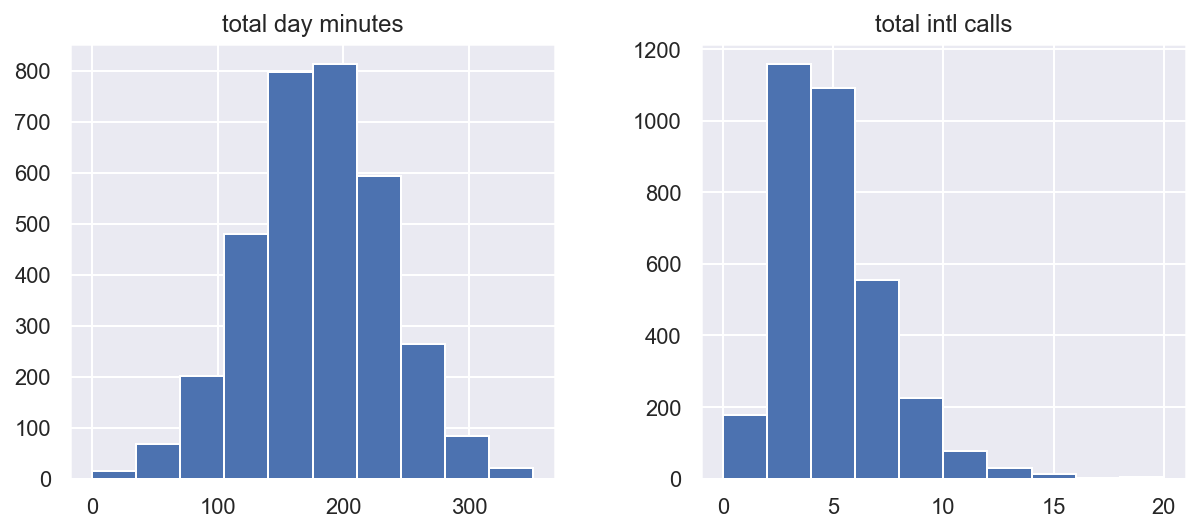

In [3]:
features = ['total day minutes', 'total intl calls']
df[features].hist(figsize=(10, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1209dc190>,
      dtype=object)

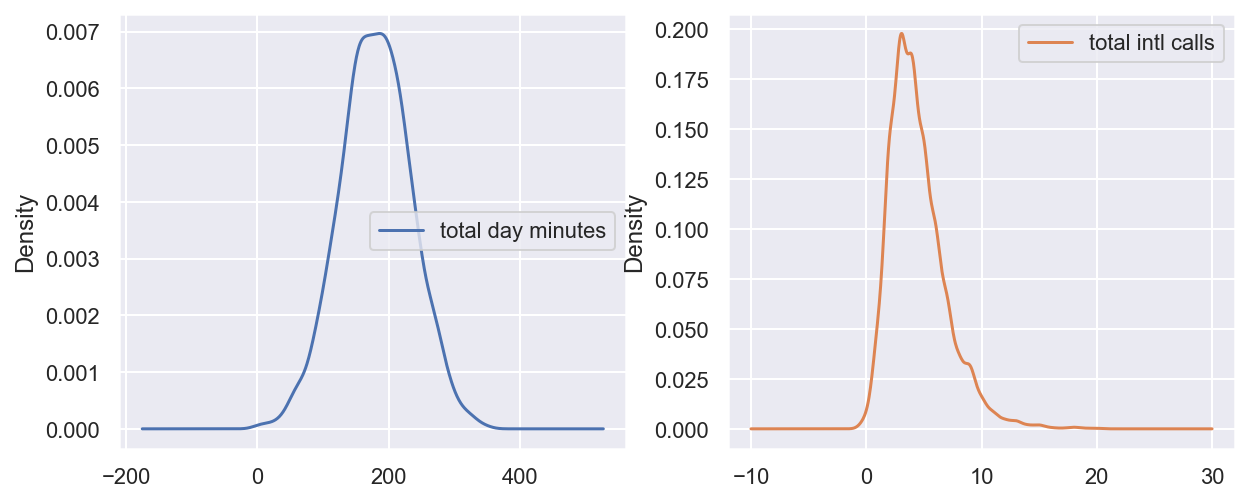

In [4]:
df[features].plot(kind='density', subplots=True, layout=(1,2), figsize=(10,4), sharex=False)

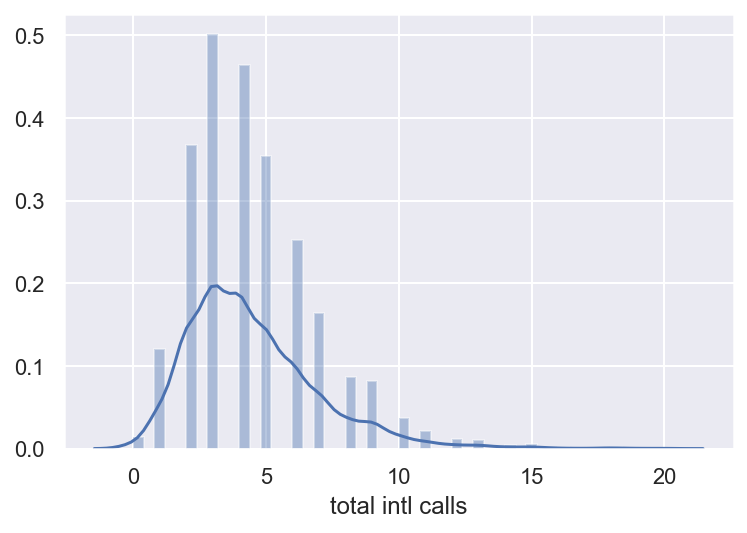

In [5]:
sns.distplot(df['total intl calls'])

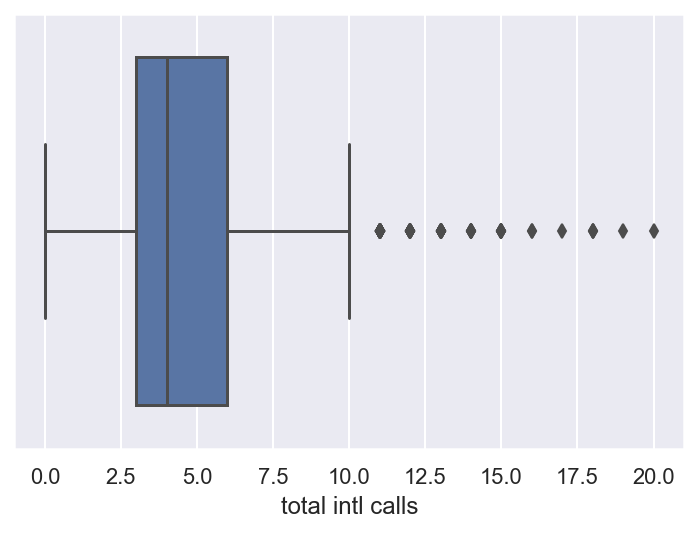

In [6]:
sns.boxplot(x='total intl calls', data=df)

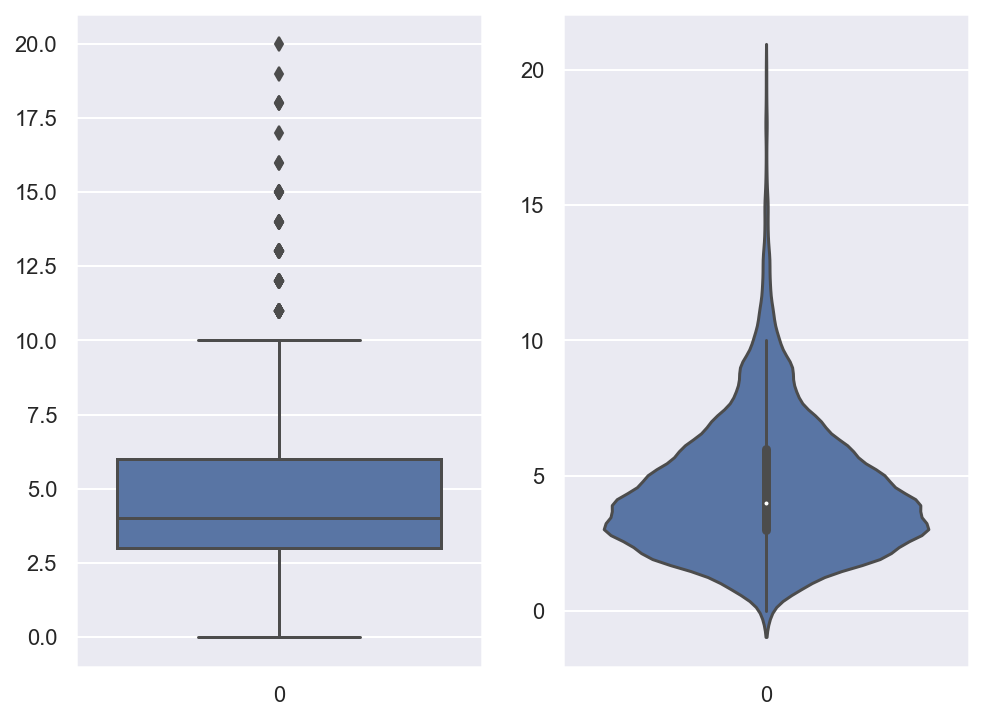

In [7]:
_, axes = plt.subplots(1,2, figsize=(8,6), sharex=False)
sns.boxplot(data=df['total intl calls'], ax=axes[0]);
sns.violinplot(data=df['total intl calls'], ax=axes[1]);

In [8]:
df[features].describe()

total day minutes  total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

In [9]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

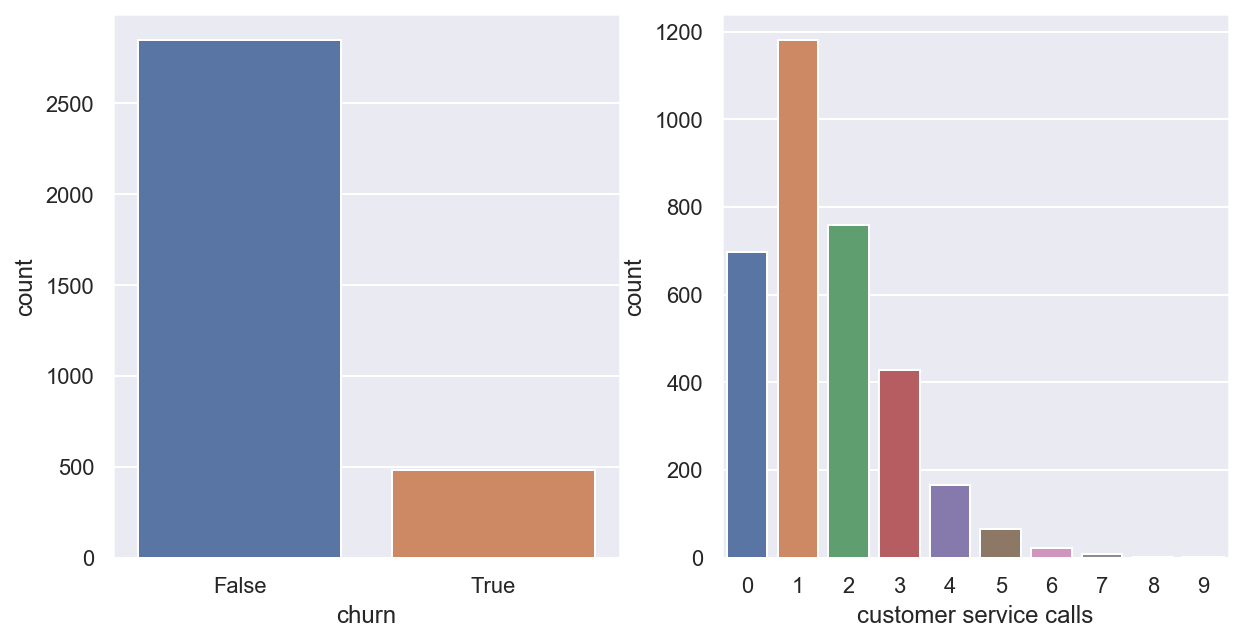

In [10]:
_, axes = plt.subplots(1,2, figsize=(10,5))
sns.countplot(df['churn'], ax=axes[0])
sns.countplot(df['customer service calls'], ax=axes[1])

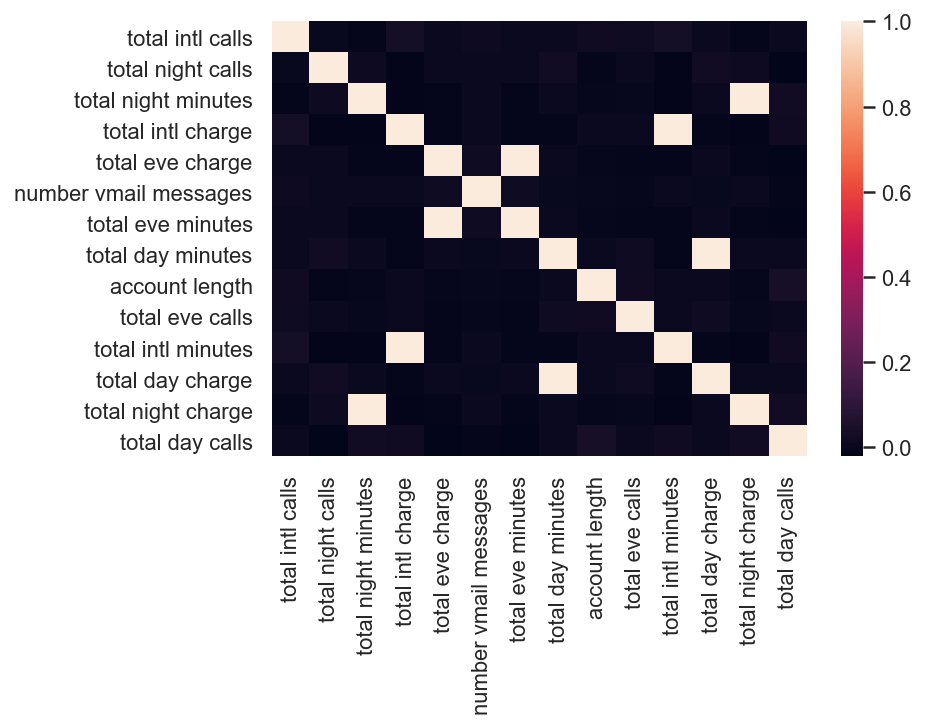

In [11]:
numerical = list(set(df.columns) - set(['state', 'international plan', 
                                        'voice mail plan', 'area code', 
                                        'churn', 'customer service calls',
                                        'phone number']))

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

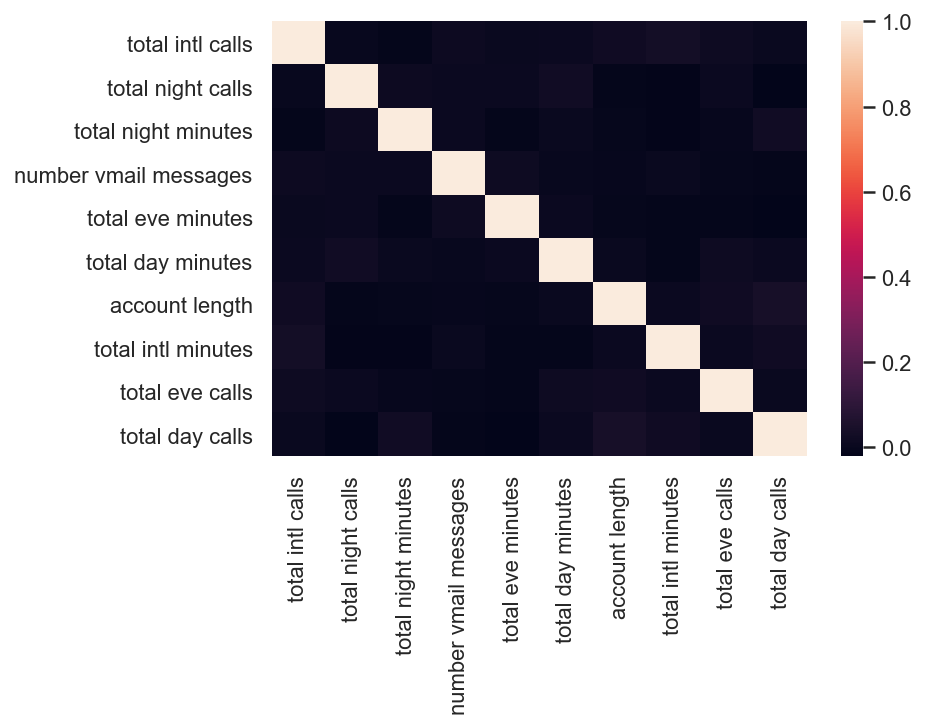

In [12]:
numerical = list(set(numerical) - set(['total day charge', 'total eve charge', 'total eve charge', 
                                       'total intl charge', 'total night charge']))

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

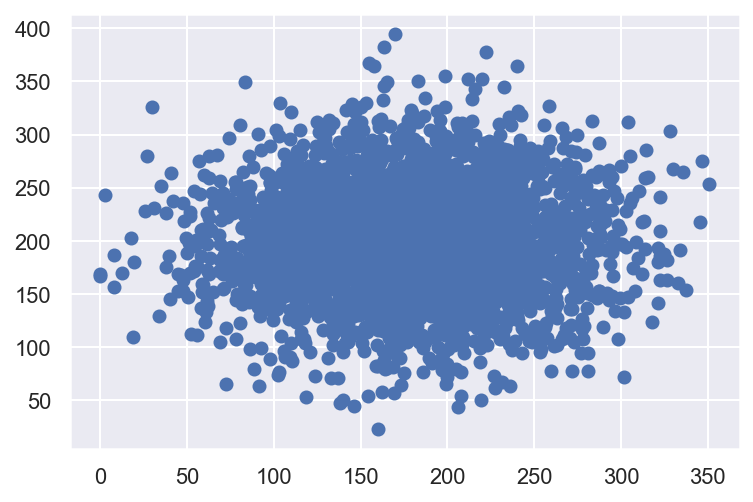

In [13]:
plt.scatter(df['total day minutes'], df['total night minutes'])

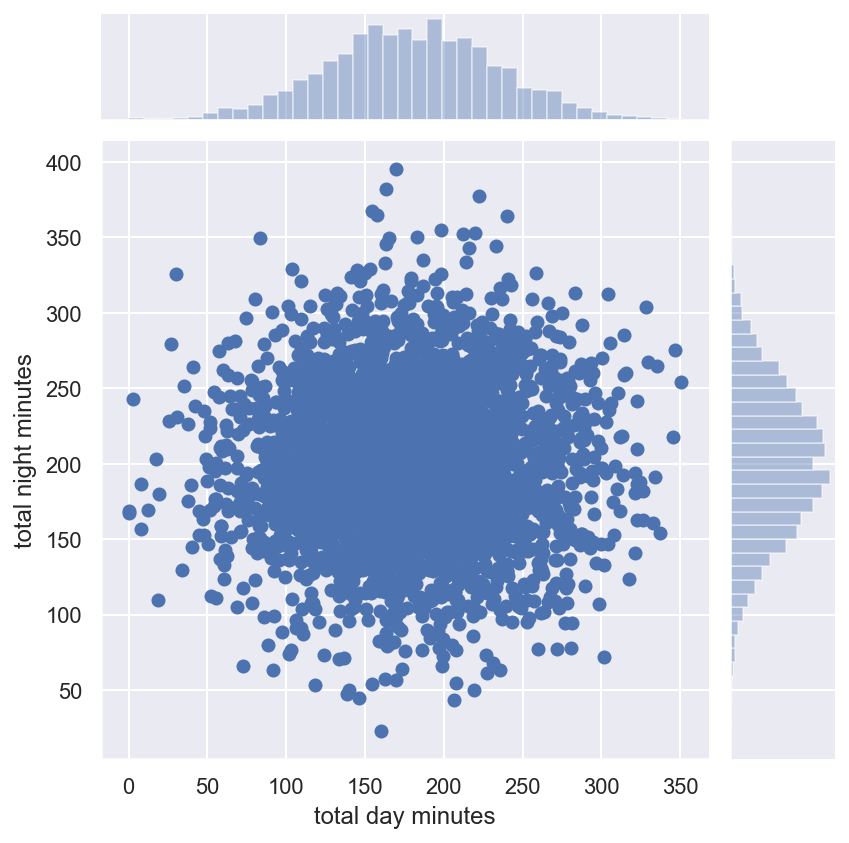

In [14]:
sns.jointplot(x='total day minutes', y='total night minutes', data=df)

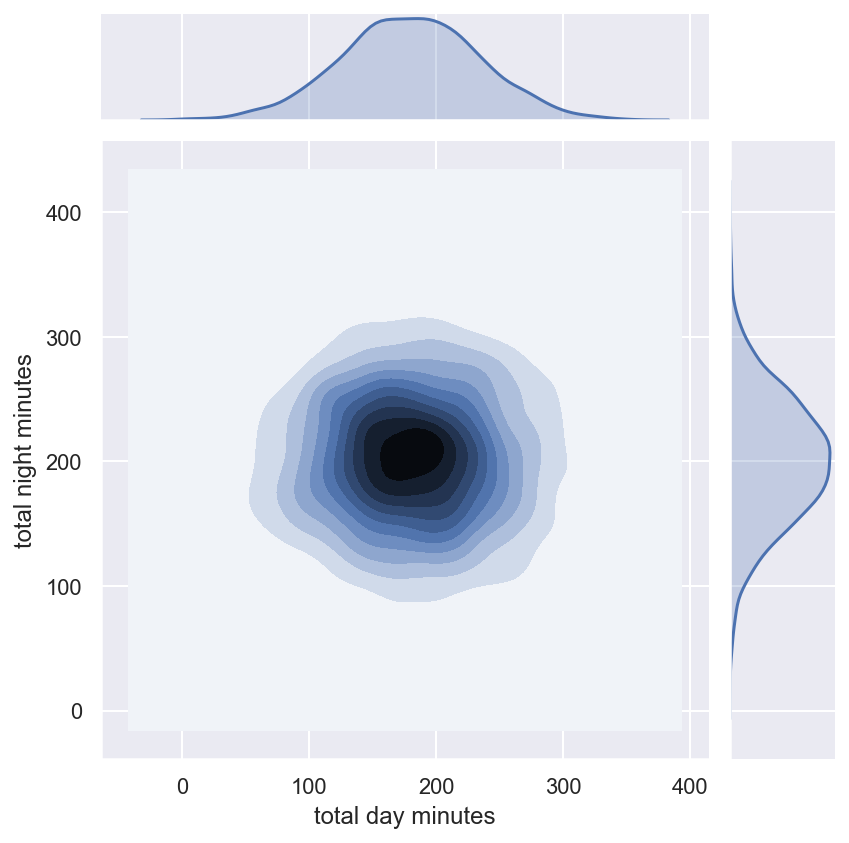

In [15]:
sns.jointplot(x='total day minutes', y='total night minutes', data=df, kind='kde')

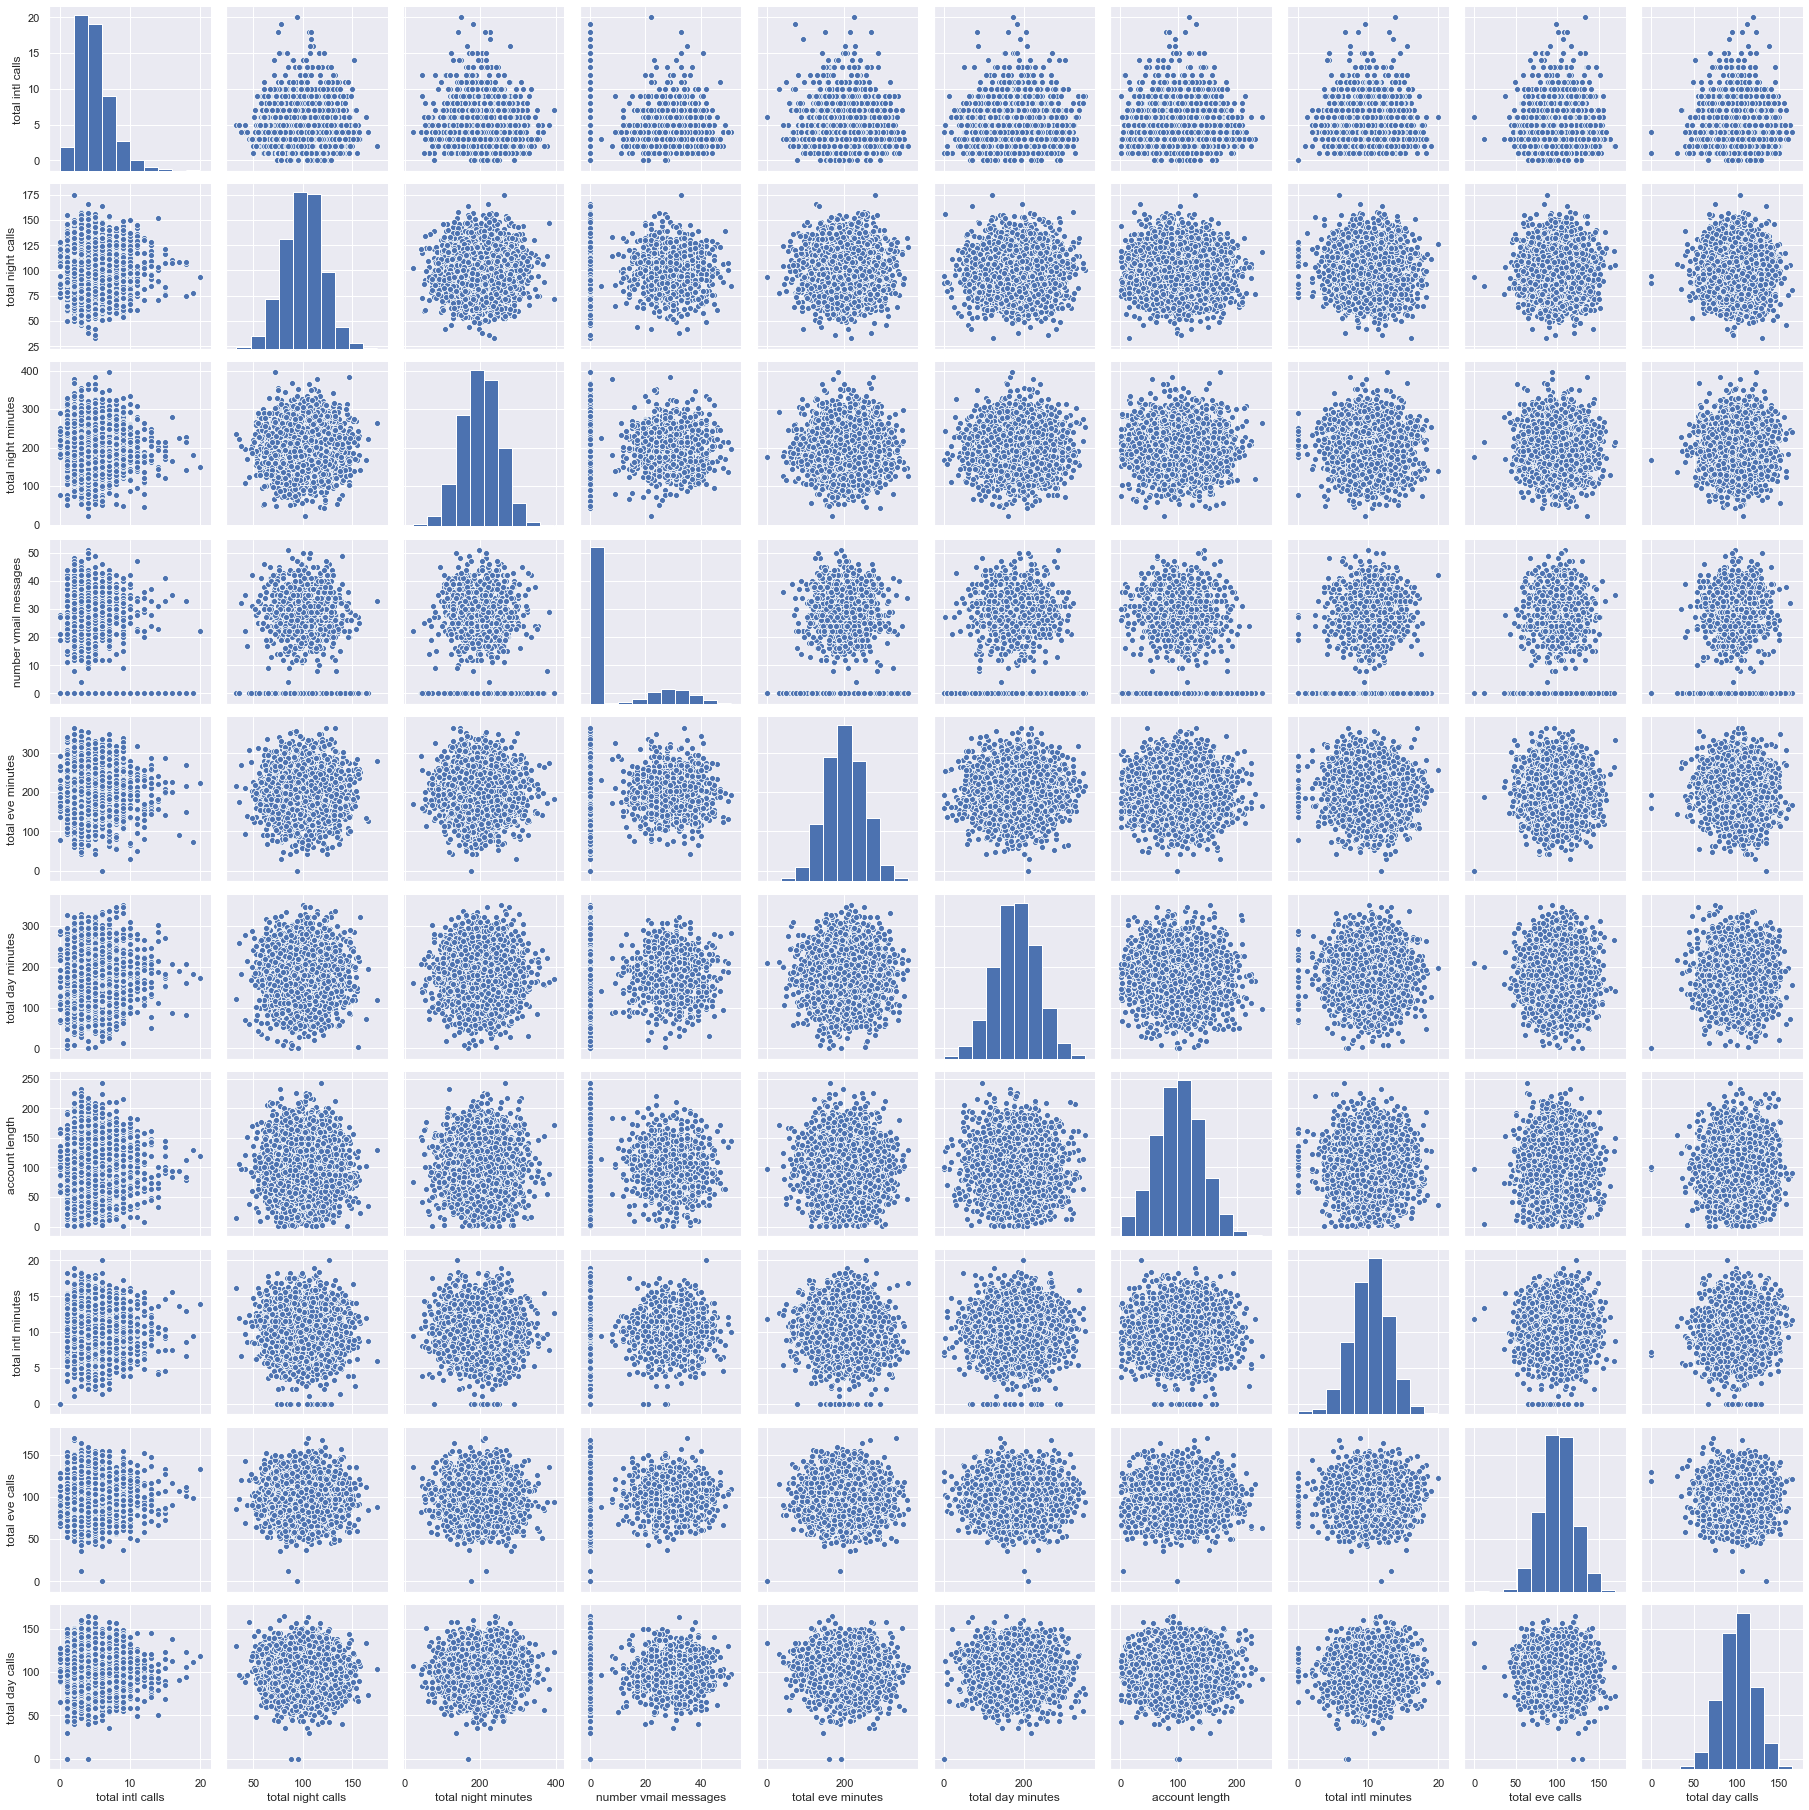

In [16]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

In [17]:
%config InlineBackend.figure_format = 'retina'

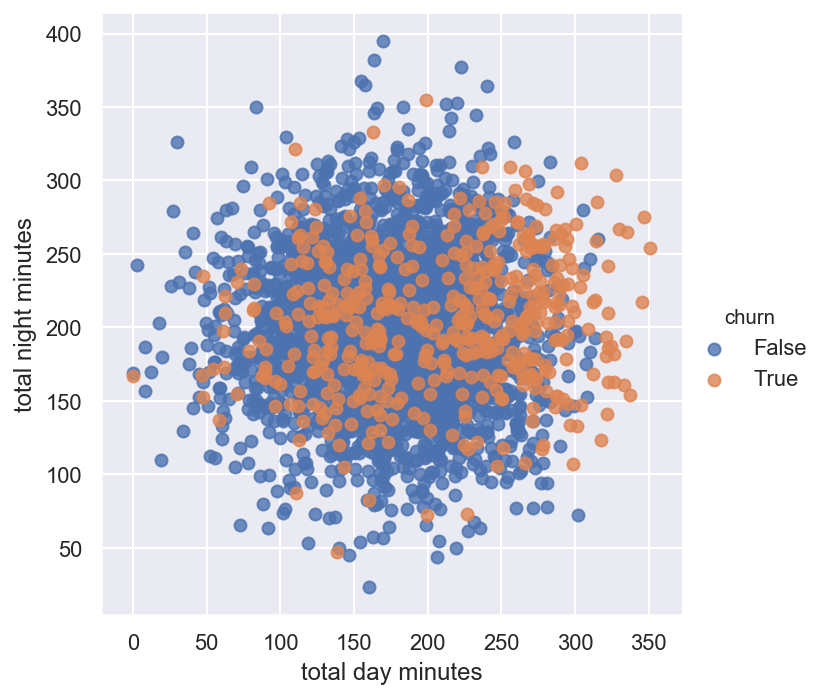

In [18]:
sns.lmplot('total day minutes', 'total night minutes', data=df, hue='churn', fit_reg=False)

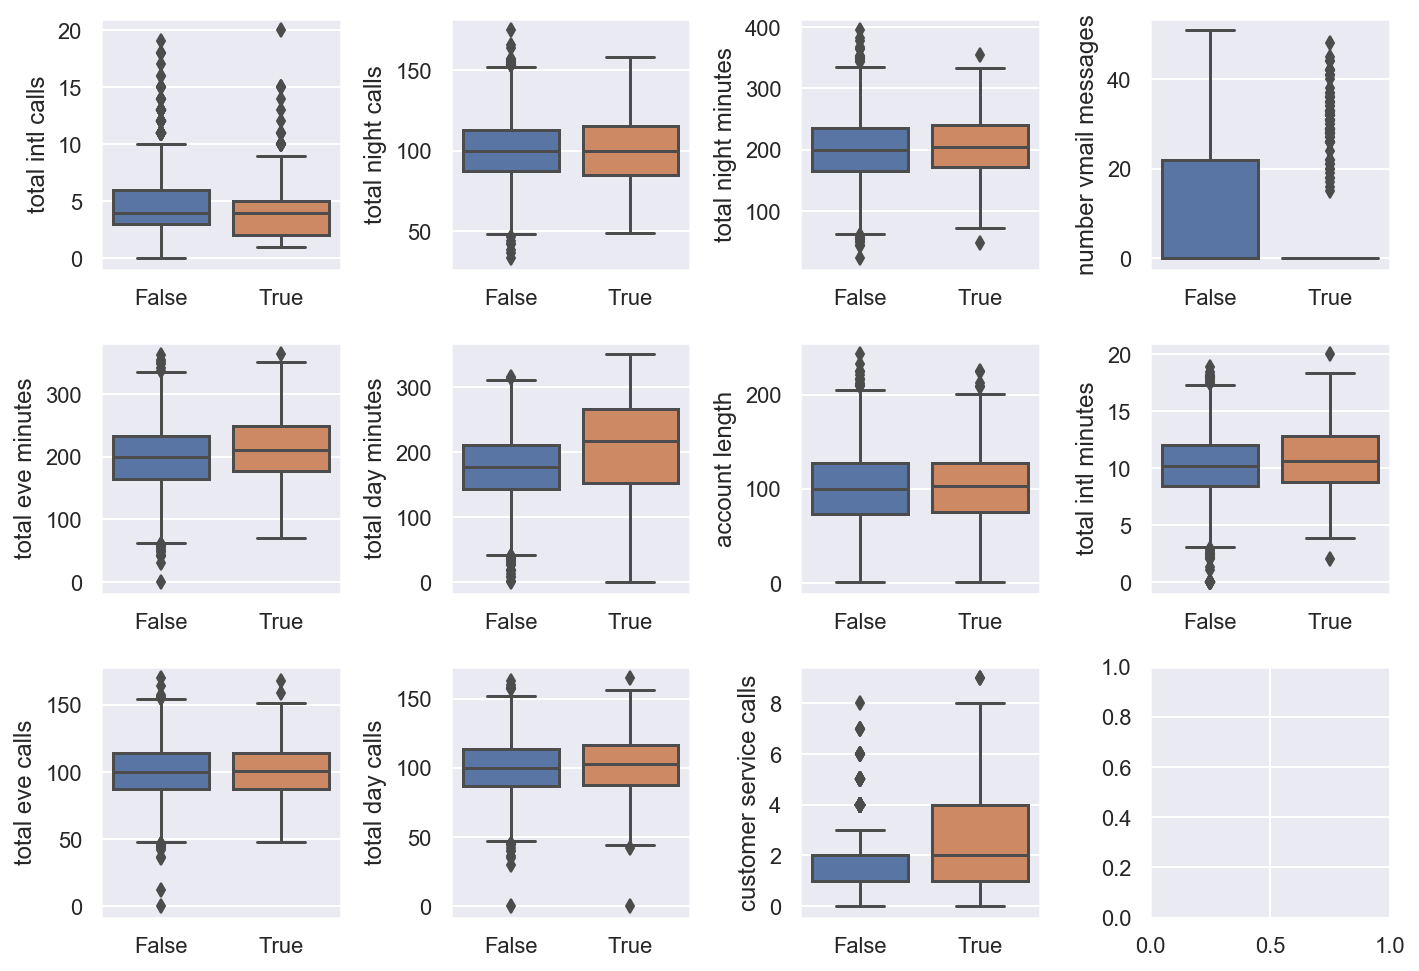

In [23]:
numerical.append('customer service calls')
fig, axes = plt.subplots(nrows=3, ncols=4, figsize = (10,7))
for i, feat in enumerate(numerical):
    ax = axes[int(i / 4), i % 4]
    sns.boxplot(x='churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

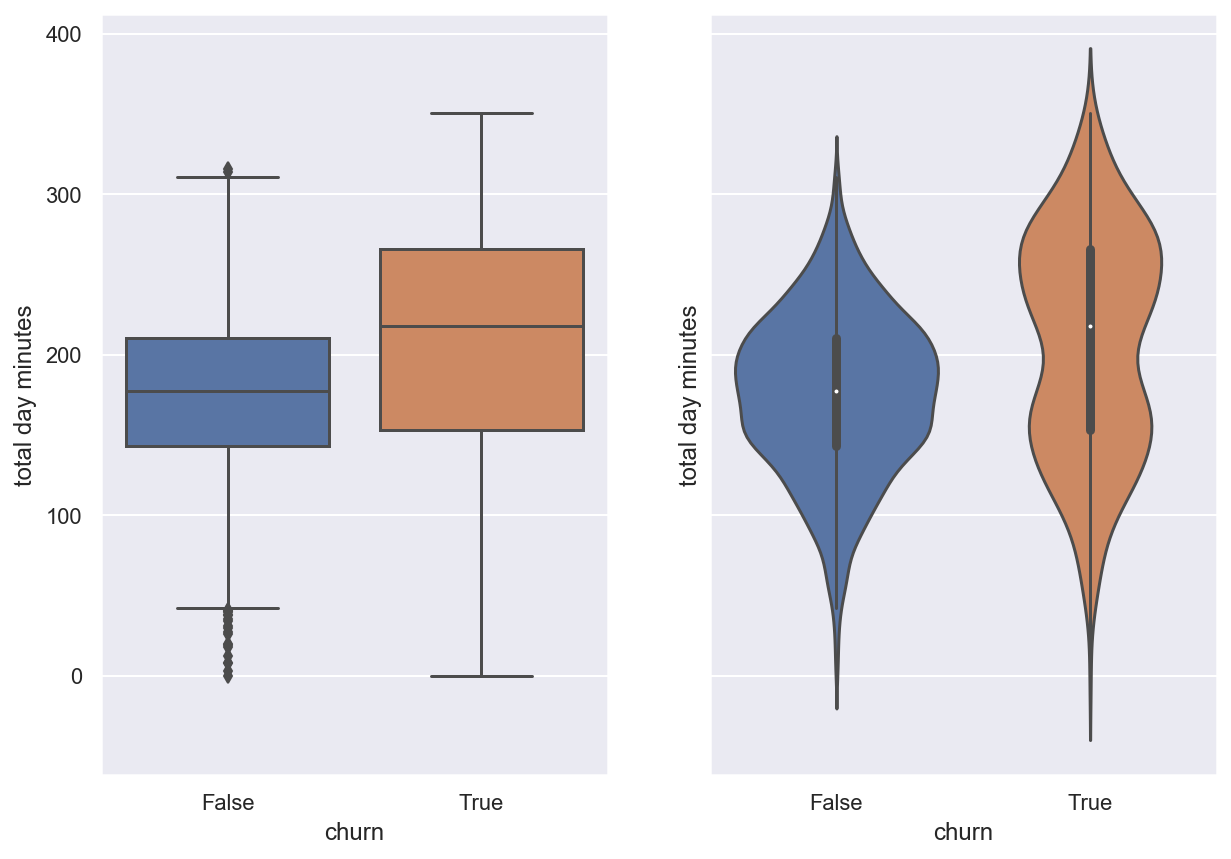

In [26]:
_, axes = plt.subplots(1, 2, figsize = (10,7), sharey=True)
sns.boxplot(x='churn', y='total day minutes', data=df, ax=axes[0])
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[1])

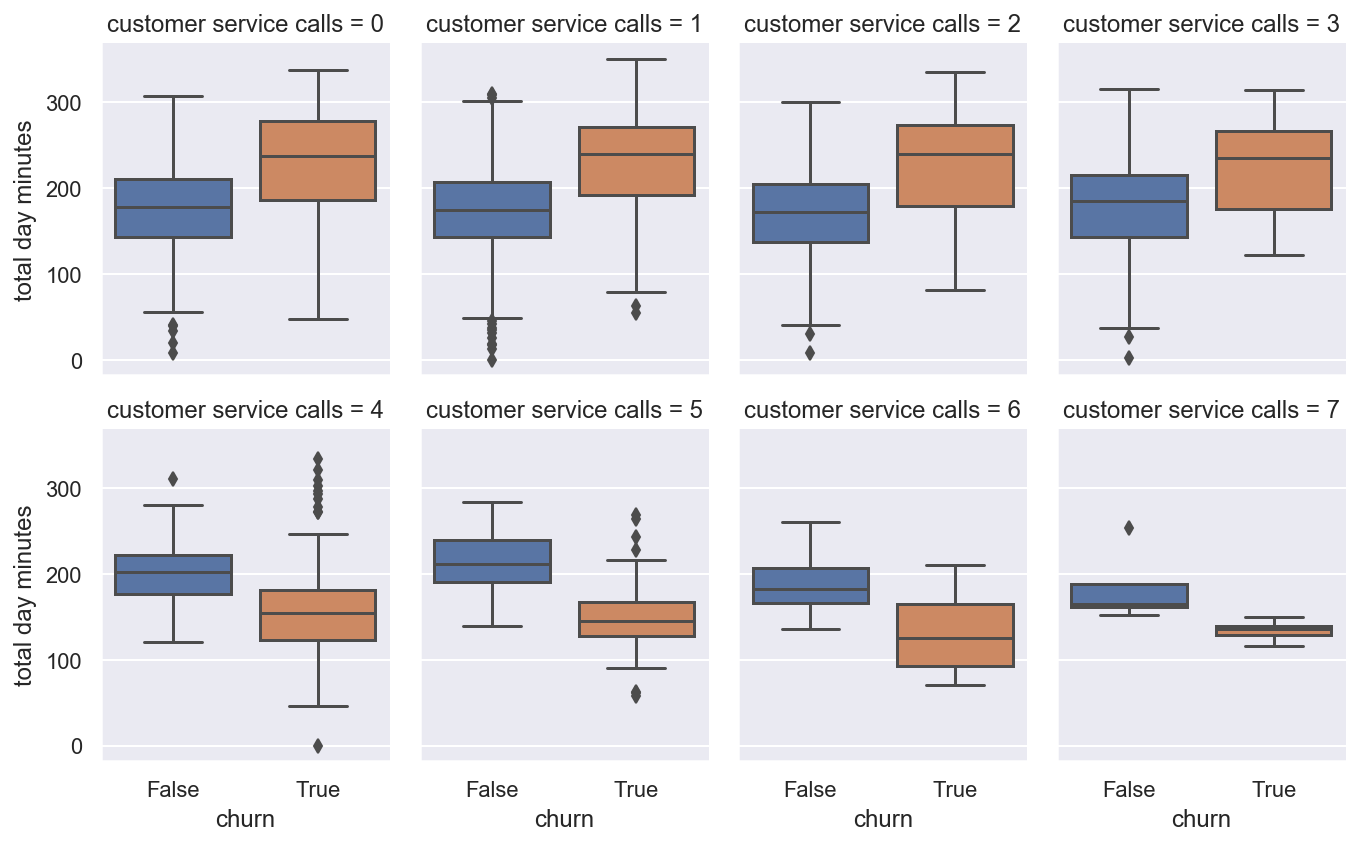

In [31]:
sns.catplot(x='churn', y='total day minutes', col='customer service calls', 
            data=df[df['customer service calls'] < 8], col_wrap=4, aspect=0.8, kind='box', height=3)

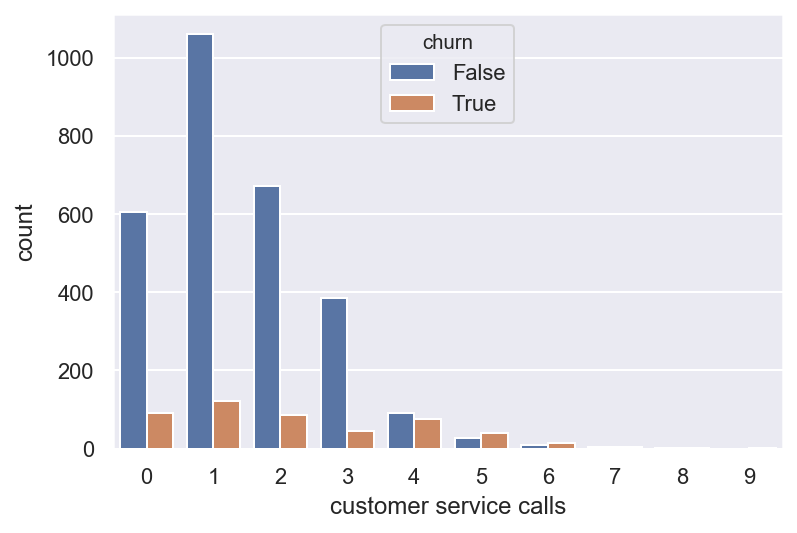

In [33]:
sns.countplot(x='customer service calls', data=df, hue='churn')

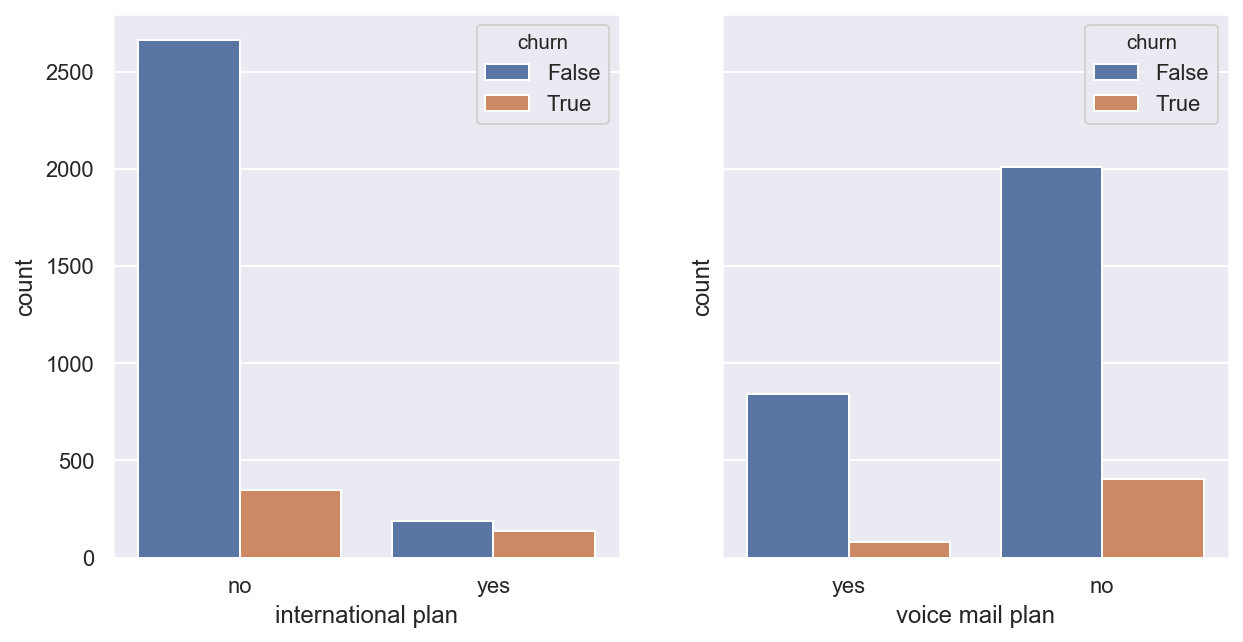

In [36]:
_, axes = plt.subplots(1, 2, figsize = (10,5), sharey=True)
sns.countplot(x='international plan', data=df, hue='churn', ax=axes[0])
sns.countplot(x='voice mail plan', data=df, hue='churn', ax=axes[1])

In [38]:
pd.crosstab(df['state'], df['churn']).T

state  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

state  WA  WI  WV  WY  
churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [48]:
df.groupby('state')['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

state        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

state        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [51]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [55]:
X = df.drop(['state', 'churn', 'phone number'], axis=1)
X['international plan'] = X['international plan'].map({'yes':1, 'no':0})
X['voice mail plan'] = X['voice mail plan'].map({'yes':1, 'no':0})
X.head()

account length  area code  international plan  voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
tsne = TSNE(random_state=14)
tsne_repr = tsne.fit_transform(X_scaled)

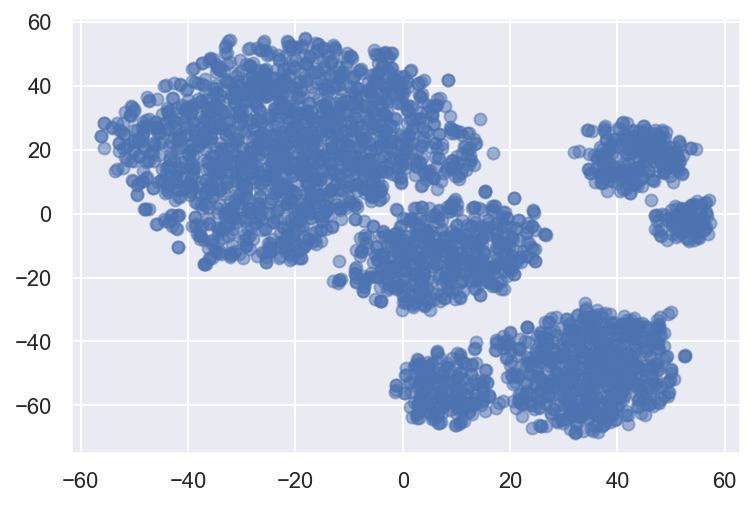

In [69]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5)

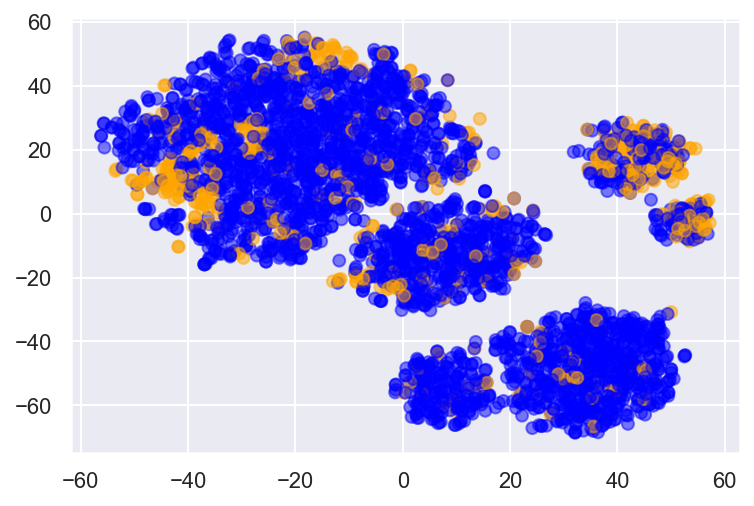

In [71]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5, c=df['churn'].map({False:'blue', True:'orange'}))

Text(0.5, 1.0, 'voice mail plan')

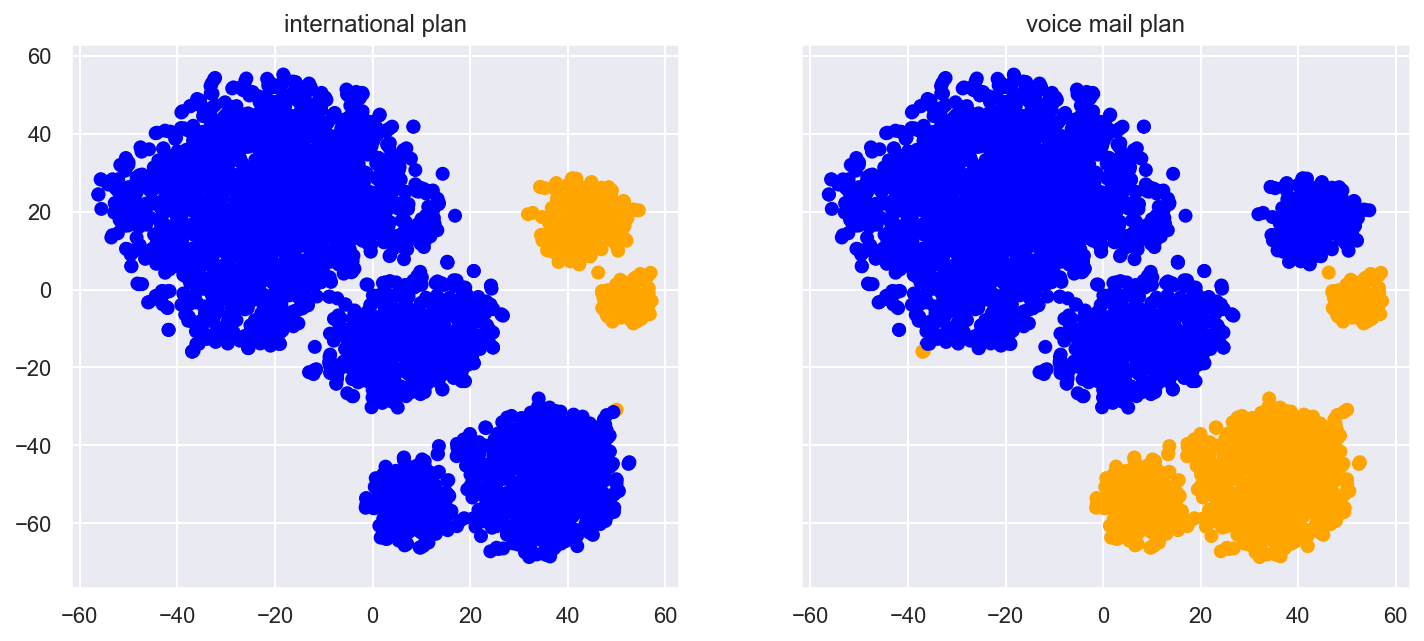

In [73]:
_, axes = plt.subplots(1, 2, figsize = (12,5), sharey=True)

axes[0].scatter(tsne_repr[:, 0], tsne_repr[:,1], c=df['international plan'].map({'yes':'orange', 'no':'blue'}))
axes[0].set_title('international plan')
axes[1].scatter(tsne_repr[:, 0], tsne_repr[:,1], c=df['voice mail plan'].map({'yes':'orange', 'no':'blue'}))
axes[1].set_title('voice mail plan')